In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.colorbar import Colorbar
from matplotlib import colors
from scipy import special
from mycolorpy import colorlist as mcp
from pathlib import Path



params = {'font.family' : 'lmodern'}
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams.update(params)

In [4]:
cwd = Path().resolve()
project_root = cwd.parent

data_equilibrium_dir = project_root / "data" / "equilibrium"
data_quench_dir = project_root / "data" / "quench"
plot_dir = project_root / "plot"

In [5]:
def comparison_data_entropy_vs_var_equilibrium_thermo():
    Entr = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic.txt")
    Var = np.loadtxt(data_equilibrium_dir/"variance_10_cells_thermodynamic.txt")
    xvals = np.arange(2, 22, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6), dpi=100)
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ at equilibrium in the thermodynamic limit", fontsize=20)
    
    ax1.scatter(xvals, Entr, color="red")
    ax2.scatter(xvals, Var, color="blue")

    ax1.set_ylabel(r"$S$", fontsize=20, color="red")
    ax2.set_ylabel(r"$\Delta N_{A}$", fontsize=20, color="blue")
    ax1.set_xlabel(r"$N_{A}$", fontsize=20)

    ax1.tick_params(direction="in", labelsize=15)
    ax2.tick_params(direction="in", labelsize=15)

    ax1.text(12, 0.530, r"$v_{i} = 1, w_{i} = 0.7$", fontsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"entropy_vs_variance_equilibrium_thermolimit.pdf", bbox_inches = 'tight')


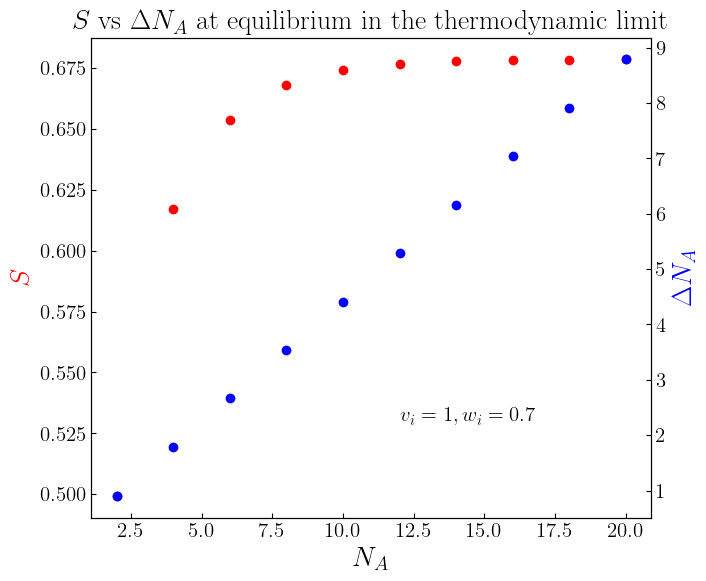

In [6]:
comparison_data_entropy_vs_var_equilibrium_thermo()

In [9]:
def comparison_data_entropy_vs_var_equilibrium_finite():
    Entr = np.loadtxt(data_equilibrium_dir/"entropy_200_cells_noflux.txt")
    Var = np.loadtxt(data_equilibrium_dir/"variance_200_cells_noflux.txt")
    xvals = np.arange(2, 202, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6), dpi=100)
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ at equilibrium in the finite system", fontsize=20)
    ax1.scatter(xvals, Entr, color="red", s=10)
    ax2.scatter(xvals, Var, color="blue", s=10)

    ax1.set_ylabel(r"$S$", fontsize=20, color="red")
    ax2.set_ylabel(r"$\Delta N_{A}$", fontsize=20, color="blue")
    ax1.set_xlabel(r"$N_{A}$", fontsize=20)

    ax1.tick_params(direction="in", labelsize=15)
    ax2.tick_params(direction="in", labelsize=15)

    ax1.text(70, 0.530, r"$v_{i} = 1, w_{i} = 0.7, N = 400$", fontsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()

    fig.savefig(plot_dir/"entropy_vs_variance_equilibrium_discrete.pdf", bbox_inches = 'tight')


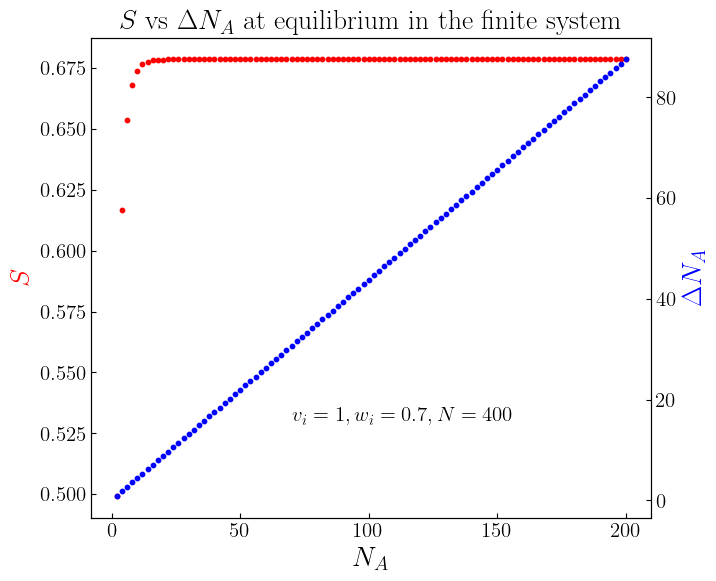

In [10]:
comparison_data_entropy_vs_var_equilibrium_finite()

In [11]:
def comparison_data_entropy_vs_var_quench():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system, quench $t=0$", fontsize=20)

    direction1 = data_quench_dir/"entropy_200_cells_noflux.txt"
    direction2 = data_quench_dir/"variance_200_cells_noflux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)

    #time = np.arange(0,108.57, 0.01)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    ax2.plot(Var, color = "blue")
    ax1.plot(Entr, color = "red")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "blue")
    ax1.set_xlabel(r"$t/\hbar$", fontsize = 20)

    ax1.text(60,1, r"$N = 400,\,\, N_{A} = 200$", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)

    #ax1.set_ylim([0,1])
    #ax2.set_ylim([0,0.01])
    #ax1.set_xlim([0,100])

    fig.savefig(plot_dir/"entropy_vs_variance_bigsize.pdf", bbox_inches = 'tight')
    

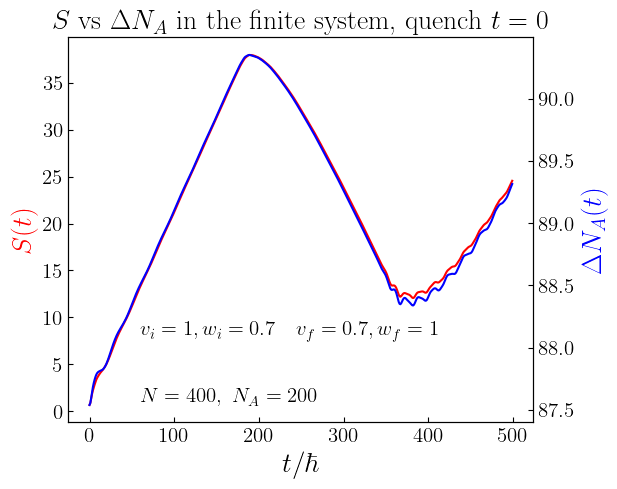

In [12]:
comparison_data_entropy_vs_var_quench()

In [13]:
def comparison_data_entropy_vs_var_quench_1():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system, quench $t=0$", fontsize=20)

    direction1 = data_quench_dir/"entropy_40_cells_noflux.txt"
    direction2 = data_quench_dir/"variance_40_cells_noflux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    ax2.plot(Var, color = "blue")
    ax1.plot(Entr, color = "red")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "blue")
    ax1.set_xlabel(r"$t/\hbar$", fontsize = 20)

    ax1.text(60,1, r"$N = 80,\,\, N_{A} = 40$", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)

    #ax1.set_ylim([0,1])
    #ax2.set_ylim([0,0.01])
    #ax1.set_xlim([0,100])

    fig.savefig(plot_dir/"entropy_vs_variance_midsize.pdf", bbox_inches = 'tight')
    

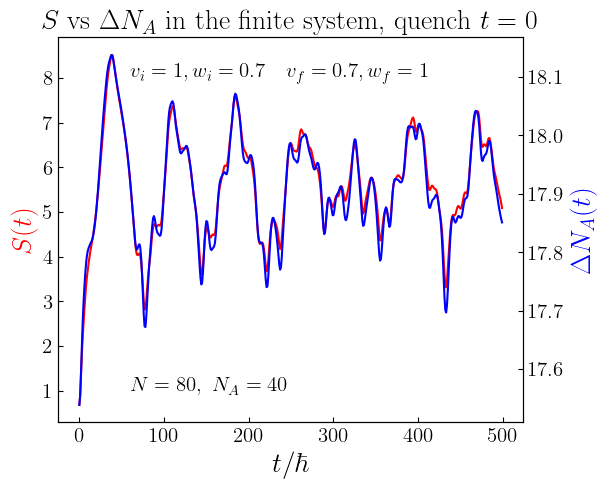

In [14]:
comparison_data_entropy_vs_var_quench_1()

In [15]:
def comparison_data_entropy_vs_var_quench_flux():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system with flux, quench $t=0$", fontsize=20)
    direction1 = data_quench_dir/"entropy_40_cells_with_flux.txt"
    direction2 = data_quench_dir/"variance_40_cells_with_flux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)

    #time = np.arange(0,108.57, 0.01)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    ax2.plot(Var, color = "blue")
    ax1.plot(Entr, color = "red")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "blue")
    ax1.set_xlabel(r"$t/\hbar$", fontsize = 20)

    ax1.text(60,1, r"$N = 80,\,\, N_{A} = 40, \phi \sim 0.0098 $", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)

    #ax1.set_ylim([0,1])
    #ax2.set_ylim([0,0.01])
    #ax1.set_xlim([0,100])

    fig.savefig(plot_dir/"entropy_vs_variance_with_flux_midsize.pdf", bbox_inches = 'tight')

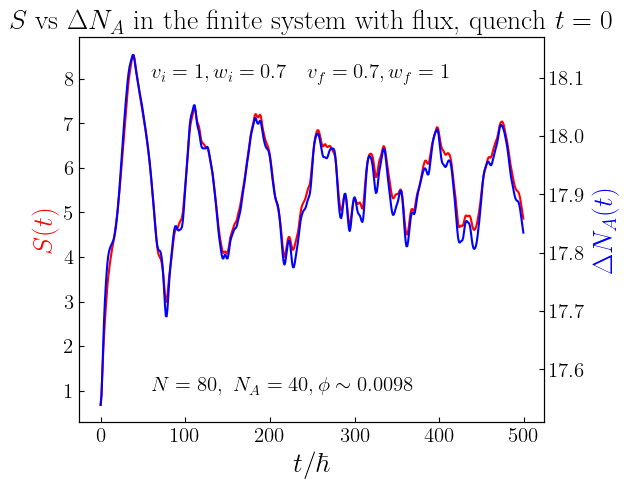

In [16]:
comparison_data_entropy_vs_var_quench_flux()